In [1]:
#|default_exp app

In [11]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

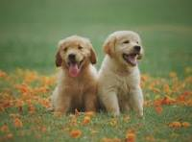

In [10]:
im = PILImage.create("dog.jpeg")
im.thumbnail((192,192))
im

In [12]:
#|export
learn = load_learner("model.pkl")

In [13]:
learn.predict(im)

('False', tensor(0), tensor([9.9998e-01, 1.6335e-05]))

In [15]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [16]:
classify_image(im)

{'Dog': 0.9999836683273315, 'Cat': 1.6334808606188744e-05}

In [21]:
#|export
image = gr.Image(width="192px", height="192px")
label = gr.Label()
examples = ["dog.jpeg", "cat.jpeg", "dunno.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [27]:
from nbdev.export import nb_export
nb_export('app.ipynb', '.')